In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt


# Ensure TensorFlow and Keras versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

# Load the ResNet50 model without the top (fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

TensorFlow version: 2.16.1
Keras version: 3.3.3


In [10]:

# Load and preprocess a single image for prediction
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    return img_array

# Predict the class of an image using the loaded model
def predict_image(model, img_path, class_indices, threshold=0.7):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class_index]

    if confidence < threshold:
        return "unknown", confidence

    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label, confidence

# Load the saved model
loaded_model = tf.keras.models.load_model('resnet50_image_classifier.h5')


In [11]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Data generator for reading and augmenting data from directories
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\hp\Documents\Miniproject\trail\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Data generator for validation/test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\hp\Documents\Miniproject\trail\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7249 images belonging to 3 classes.
Found 1858 images belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image does not belong to any of the known classes.


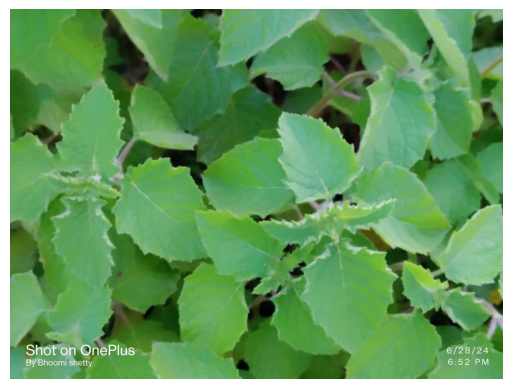

In [12]:
# Example usage
img_path = "Unknown_class_2.jpg"
predicted_class, confidence = predict_image(loaded_model, img_path, train_generator.class_indices)

if predicted_class == "unknown":
    print("The image does not belong to any of the known classes.")
else:
    print(f"The predicted class is: {predicted_class} with confidence {confidence:.2f}")
# Open the image
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()